![king county image, from https://www.racialequityalliance.org/jurisdictions/king-county-washington/](https://www.racialequityalliance.org/wp-content/uploads/2016/10/assessors_social-1.jpg)


# King County Real Estate Prices

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?


Amazon has awarded us a Grant for 60 million dollars to go towards affordable housing aquisitions in the King County Area.


In [213]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, mean_absolute_error
import utils 




## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [76]:
#Reading in our data
df = pd.read_csv('../../data/kc_house_data.csv')

In [77]:
#Looking at column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [78]:
#Checking int, float columns
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [79]:
#Looking at null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

- Null values found in waterfront, view, and yr_renovated.

### First Observations
 - In price, the max price is very significantly larger than the mean. We will look further into the column to evaluate outliers.
 - In bedrooms, there is a large max value indicating an outlier. We will remove later. This column may be treated as  categorical. 
 - In bathrooms, the max value is much higher than most of the dataset. This many bathrooms may be from a building that is not representative of the homes we would like to work with in our model. This column may be treated as categorical.
 - In sqft_living the max value is significantly larger than the mean. This large of a building may not be representative of the homes we would like to work with in our model.
 - In sqft_lot, the max value is significantly larger than a large portion of the dataset. This large of a lot may not be representative of the homes we would like to work with in our model. 
 - In floors, there is a max value that is larger than the majority of our dataset. We may restrict the number of floors in our model. 
 - In yr_built
 - In yr_renovated
 - In zipcode
 - In lat and Long
 - In sqft_living15
 - In sqft_lot15

In [80]:
#Explore object columns
obj_cols = [c for c in df.columns if df[c].dtype == 'object']
df[obj_cols].describe()

date waterfront   view condition      grade sqft_basement
count       21597      19221  21534     21597      21597         21597
unique        372          2      5         5         11           304
top     6/23/2014         NO   NONE   Average  7 Average           0.0
freq          142      19075  19422     14020       8974         12826

### First Observations

- Date column may need to be reformatted so that we can work with the values
- Waterfront has 11% null values and 88% of the values recorded are no. Only ~1% of the properties have waterfront access
- View has some null values and 90% have a value of none. 
- Condition is an ordinal feature with values of 1 - 5 
- Grade is an ordinal feature with values 3 - 13 
- sqft_basement is being treated as an object when it is an integer. 

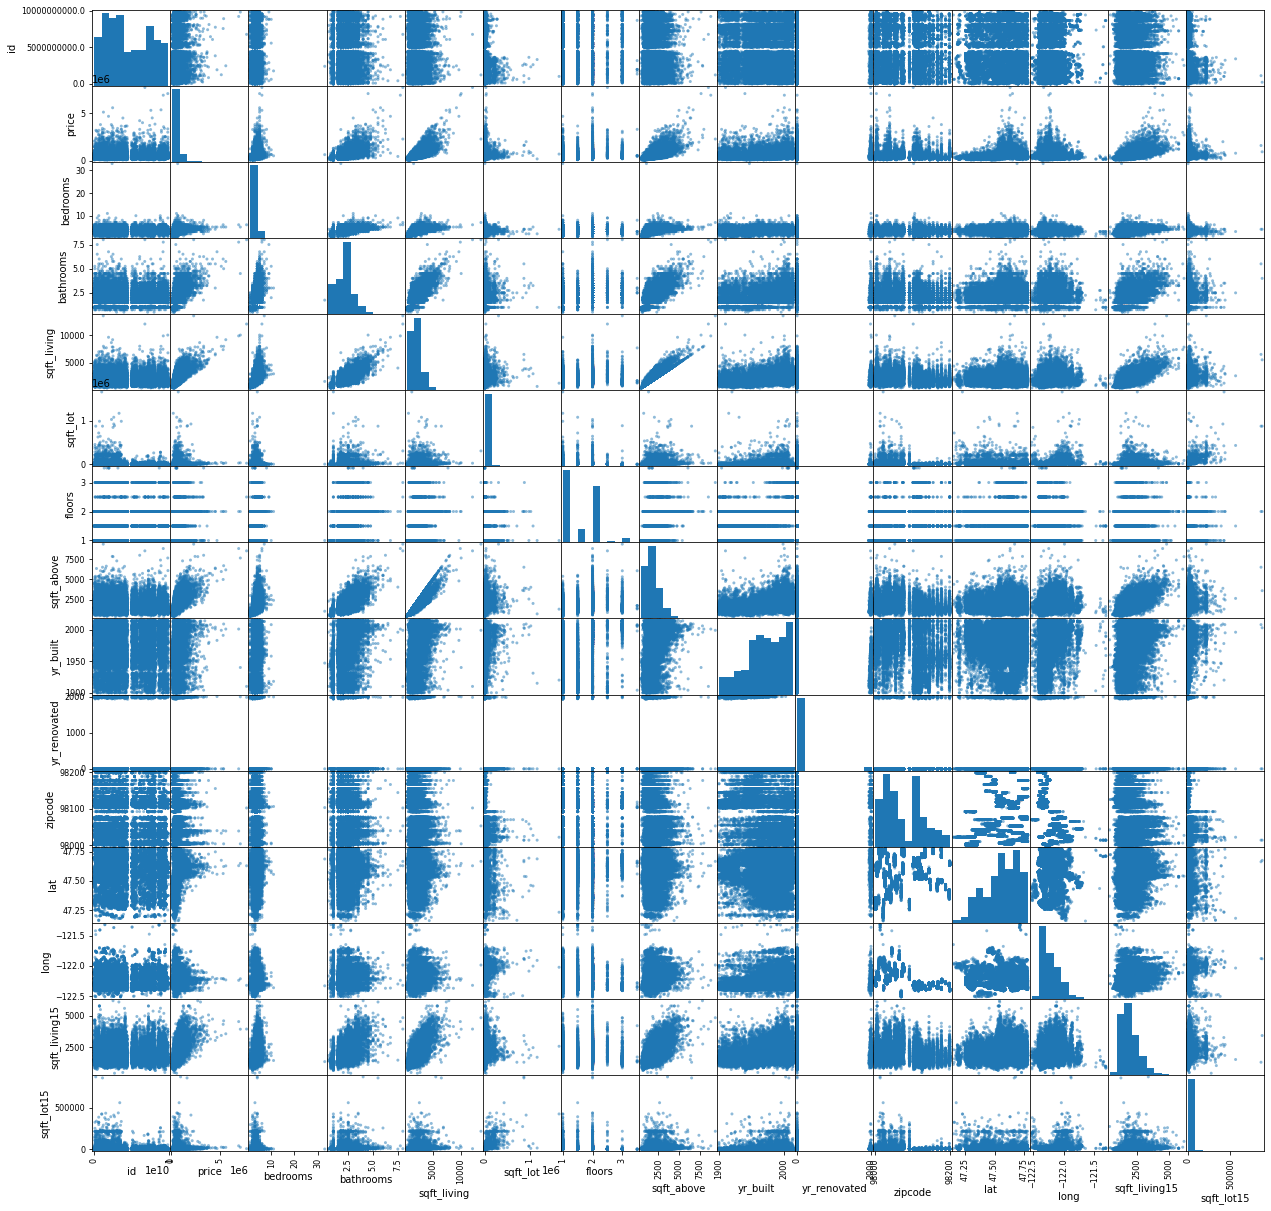

In [81]:
#Scatter matrix of all data to get a quick view of any obvious trends. 
pd.plotting.scatter_matrix(df, figsize = [21,21]);
plt.show()

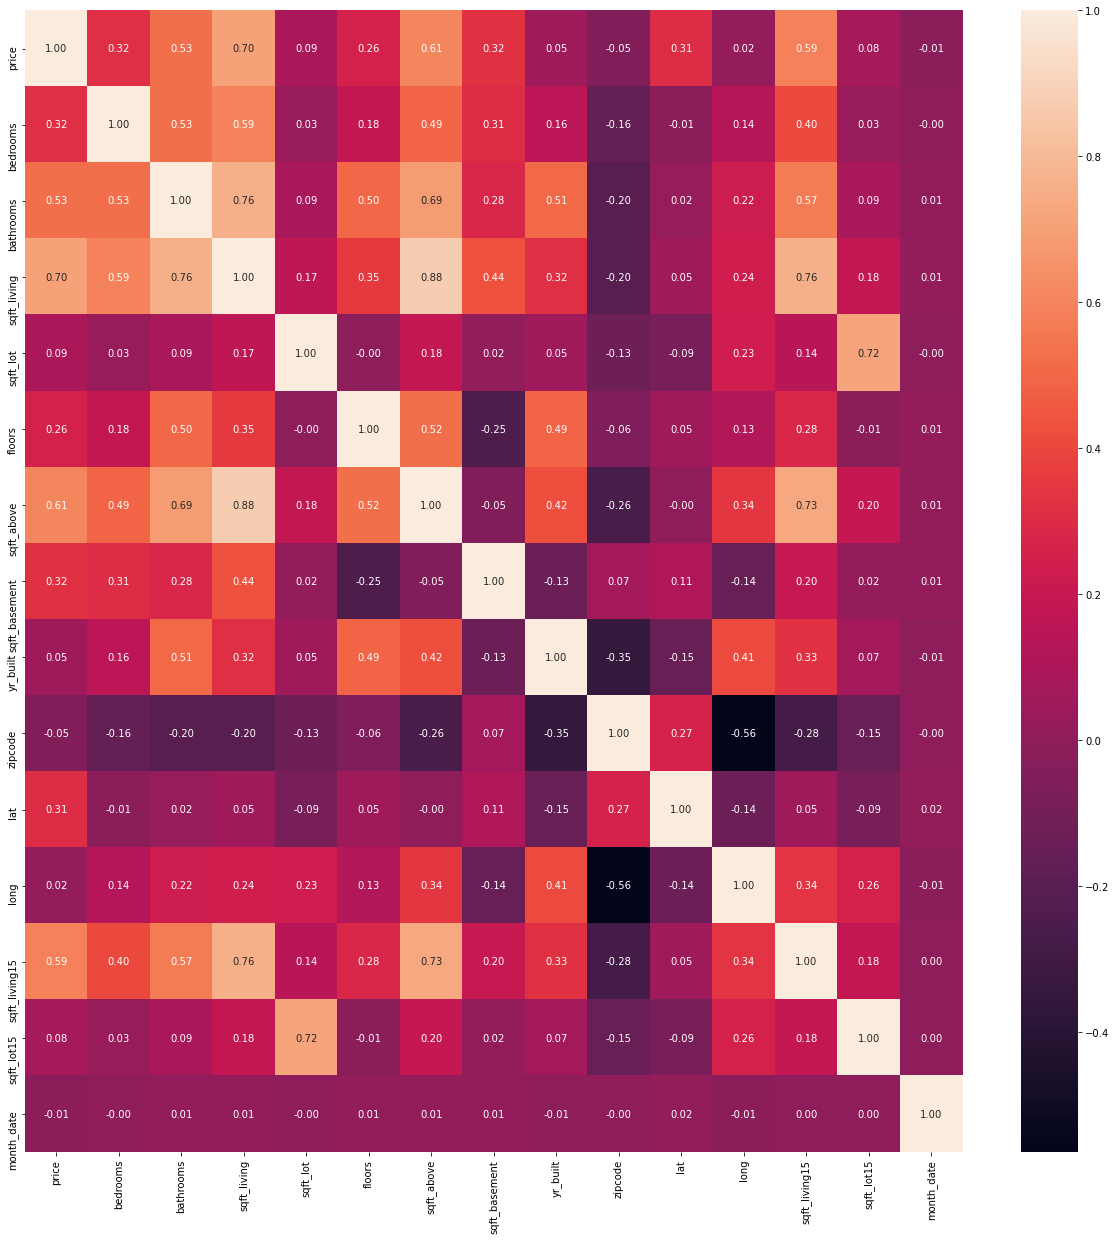

In [82]:
#Initial heatmap highlighing obvious correlations with Price
plt.figure(figsize = (21,21))
sns.heatmap(df_limited.corr(), annot = True, fmt = '.2f');

- sqft_living shows the highest correlation with price 

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [83]:
#Creating unique dataframe with restricted values
df_limited  = df

In [84]:
#There are ? values in sq_ft basement, causing it to be categorized as an object. Removing those values.
#Initial analysis showed the sqft basement is the sqft living space minus the sqft above space.
df_limited['sqft_basement'] = df_limited['sqft_living'] - df_limited['sqft_above']


In [86]:
#Dropping Id, waterfront, View, yr_renovated. 
#Id won't be very useful for our analysis. 
#Waterfront properties only represent ~1% of the properties in the dataset and are not significant for our model.
#90% of the values in view are none. The remaining values aren't significant enough to remain in our model.
#97% of vales in yr_renovated are either null or 0.0
df_limited = df.drop(columns = ['id', 'waterfront', 'view', 'yr_renovated'])

In [87]:
#Turning the grade column into a numerical column
grade_df = df_limited[["grade"]]

for i in range(len(grade_df)):
    grade_df.at[i,"grade"] = grade_df.at[i,"grade"][:1]
    grade_df.at[i,"grade"].strip()
    grade_df.at[i,"grade"] = int(grade_df.at[i,"grade"])

grade_df.rename(columns = {'grade': 'num_grade'}, inplace = True)

df_limited = pd.concat([grade_df, df_limited], axis=1)

In [88]:
df_limited['num_grade'] = df_limited['num_grade'].astype(str).astype(int)

In [89]:
#Turning object date into a datetime64 and isolating month
df_limited['date'] = pd.to_datetime(df_limited['date'])


In [90]:
df_limited['month_date'] = df_limited['date'].dt.strftime('%m')

In [91]:
df_limited['month_date'] = df_limited['month_date'].astype(str).astype(int)

In [111]:
#Restricting bedroom number to exclude outliers and be more representative of single family homes.
df_limited = df_limited[(df_limited['bedrooms'] < 6) & (df_limited['bedrooms'] > 1)]

In [114]:
#Restricting bathroom number to exclude outliers and be more representative of single family homes.
df_limited = df_limited[df_limited['bathrooms'] < 5]

In [116]:
#Restricting floor number to exclude outliers and be more representative of single family homes.
df_limited = df_limited[df_limited['floors'] <= 3]

In [117]:
#Restricting price to train our model on realistic home prices
df_limited = df_limited[df_limited['price'] < 2000000]

In [118]:
#Restricting the square foot living space 
df_limited = df_limited[df_limited['sqft_living'] < 6000]

In [119]:
#restricting the square foot lot space
df_limited = df_limited[df_limited['sqft_lot'] < 10000]

In [120]:
#restricting basement size
df_limited = df_limited[df_limited['sqft_basement'] < 2000]

3    7090
4    4589
2    2348
5     951
Name: bedrooms, dtype: int64

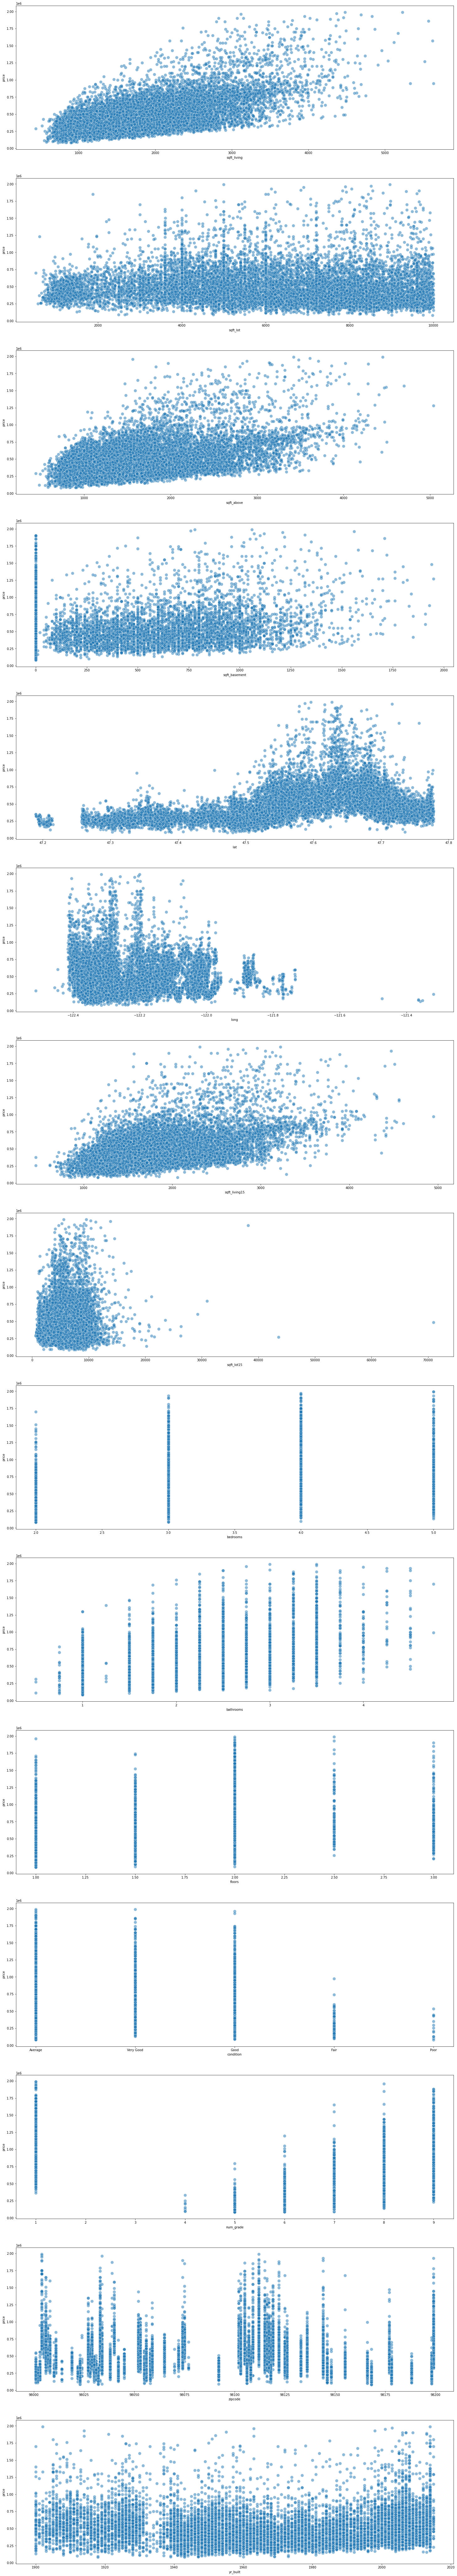

In [123]:
features = [
     "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "lat", "long",
    "sqft_living15", "sqft_lot15", "bedrooms", "bathrooms", "floors", 
     "condition", "num_grade", "zipcode", "yr_built"
    
]


fig = plt.figure(figsize=(25, len(features)*10))
for i, col in enumerate(features):
    ax = fig.add_subplot(len(features), 1, i + 1)
    if col in features:
        sns.scatterplot(x=col, y="price", data=df_limited, ax=ax, alpha=0.5, s=100)

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

In [124]:
#Setting our X and Y for our train test split. 
X = df_limited.drop(columns = 'price')
y = df_limited['price']

In [125]:
#Performing train test split using test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 42)

In [98]:
print("X Train:")
display(X_train.describe())
print("X Test:")
display(X_test.describe())

X Train:


num_grade      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  16197.000000  16197.000000  16197.000000  16197.000000  1.619700e+04   
mean       6.949003      3.371612      2.115639   2081.711181  1.514297e+04   
std        1.902992      0.905932      0.767789    918.940576  4.202426e+04   
min        1.000000      1.000000      0.500000    370.000000  5.200000e+02   
25%        7.000000      3.000000      1.750000   1420.000000  5.044000e+03   
50%        7.000000      3.000000      2.250000   1910.000000  7.600000e+03   
75%        8.000000      4.000000      2.500000   2550.000000  1.069600e+04   
max        9.000000     11.000000      8.000000  13540.000000  1.651359e+06   

             floors    sqft_above  sqft_basement      yr_built       zipcode  \
count  16197.000000  16197.000000   16197.000000  16197.000000  16197.000000   
mean       1.493517   1789.806693     291.904488   1970.923319  98078.293573   
std        0.538916    828.175379     443.171013     29.371828     53.585594   
min        1.000000    370.000000       0.000000   1900.000000  98001.000000   
25%        1.000000   1190.000000       0.000000   1951.000000  98033.000000   
50%        1.500000   1570.000000       0.000000   1975.000000  98065.000000   
75%        2.000000   2217.000000     560.000000   1997.000000  98118.000000   
max        3.500000   9410.000000    4820.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15    month_date  
count  16197.000000  16197.000000   16197.000000   16197.000000  16197.000000  
mean      47.561124   -122.213683    1986.758474   12720.142742      6.572884  
std        0.138049      0.141943     686.200149   26605.790661      3.113233  
min       47.155900   -122.519000     399.000000     651.000000      1.000000  
25%       47.472900   -122.329000    1490.000000    5100.000000      4.000000  
50%       47.573000   -122.232000    1840.000000    7620.000000      6.000000  
75%       47.678200   -122.124000    2360.000000   10080.000000      9.000000  
max       47.777600   -121.315000    6210.000000  871200.000000     12.000000

X Test:


num_grade     bedrooms    bathrooms   sqft_living       sqft_lot  \
count  5399.000000  5399.000000  5399.000000   5399.000000    5399.000000   
mean      6.945175     3.372476     2.116457   2076.239118   14970.398778   
std       1.921957     0.898720     0.772686    915.734735   39528.324556   
min       1.000000     1.000000     0.750000    410.000000     609.000000   
25%       7.000000     3.000000     1.750000   1430.000000    5026.500000   
50%       7.000000     3.000000     2.250000   1920.000000    7633.000000   
75%       8.000000     4.000000     2.500000   2540.000000   10649.000000   
max       9.000000    10.000000     7.750000  10040.000000  920423.000000   

            floors   sqft_above  sqft_basement     yr_built       zipcode  \
count  5399.000000  5399.000000    5399.000000  5399.000000   5399.000000   
mean      1.495925  1785.105946     291.133173  1971.233191  98076.922023   
std       0.542029   826.592238     441.218858    29.387849     53.290514   
min       1.000000   410.000000       0.000000  1900.000000  98001.000000   
25%       1.000000  1190.000000       0.000000  1952.000000  98033.000000   
50%       1.500000  1550.000000       0.000000  1975.000000  98065.000000   
75%       2.000000  2209.000000     560.000000  1997.000000  98117.000000   
max       3.000000  8860.000000    3260.000000  2015.000000  98199.000000   

               lat         long  sqft_living15     sqft_lot15   month_date  
count  5399.000000  5399.000000    5399.000000    5399.000000  5399.000000  
mean     47.556975  -122.214858    1986.327468   12874.198370     6.577329  
std       0.140018     0.137014     682.381656   29193.074153     3.121103  
min      47.162200  -122.515000     670.000000     659.000000     1.000000  
25%      47.462350  -122.327000    1490.000000    5100.000000     4.000000  
50%      47.569000  -122.227000    1840.000000    7620.000000     6.000000  
75%      47.677700  -122.127000    2378.000000   10092.000000     9.000000  
max      47.777500  -121.315000    5790.000000  858132.000000    12.000000

In [145]:
train_df = pd.concat([X_train, y_train], axis = 1)


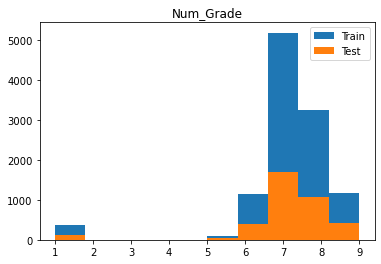

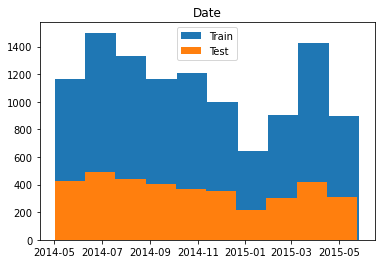

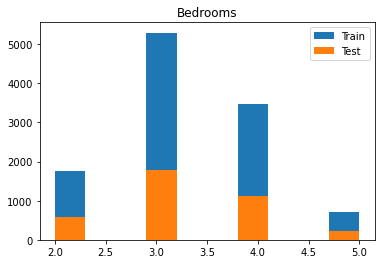

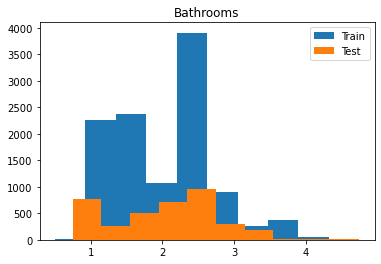

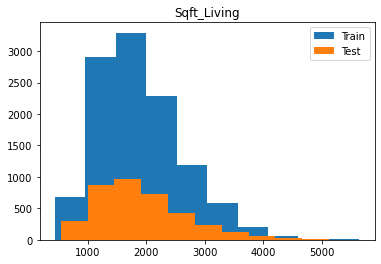

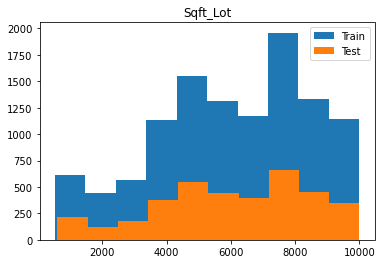

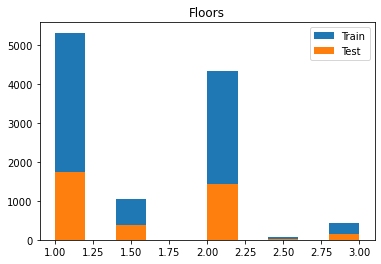

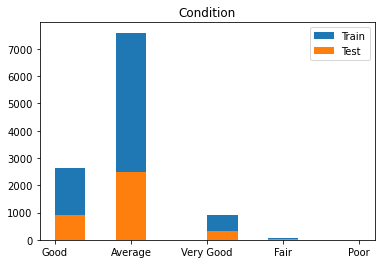

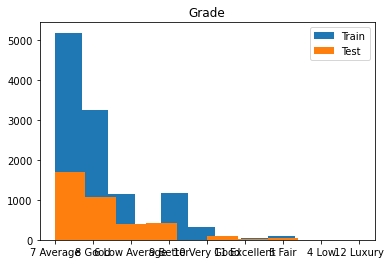

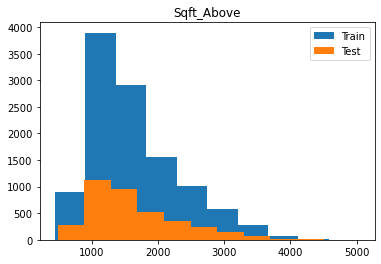

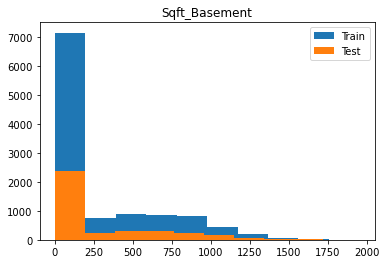

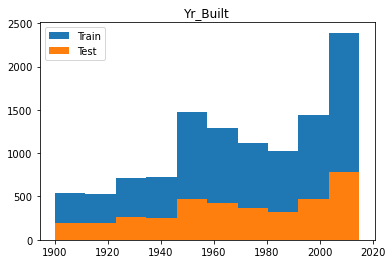

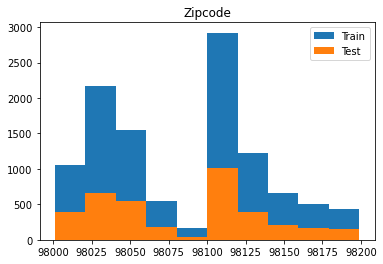

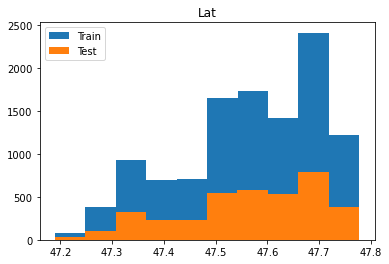

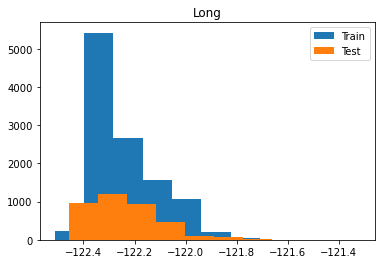

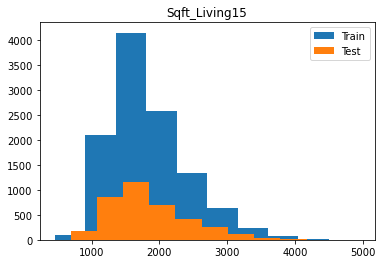

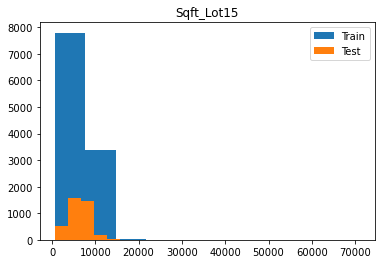

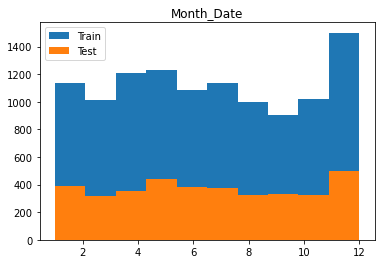

In [143]:
used_cols = [c for c in df_limited.columns if c not in ['price']]

for col in used_cols:
    plt.hist(X_train[col], label = 'Train')
    plt.hist(X_test[col], label = 'Test')
    plt.title(f"{col.title()}")
    plt.legend()
    plt.show()

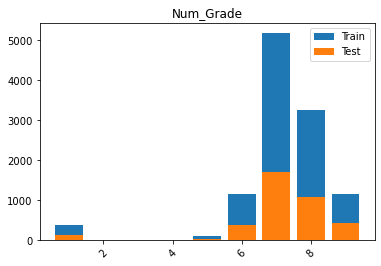

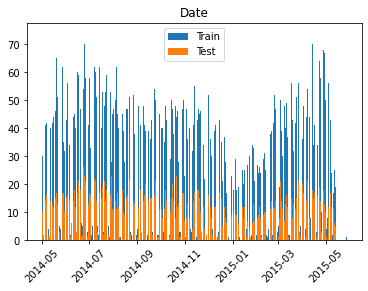

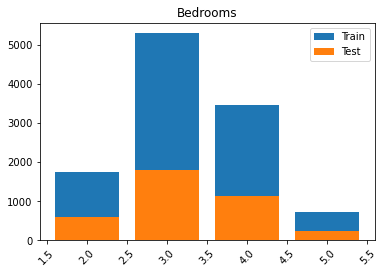

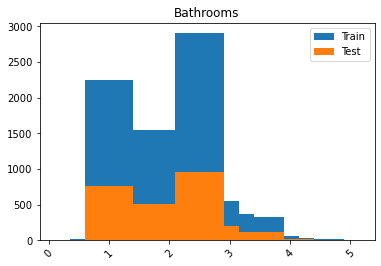

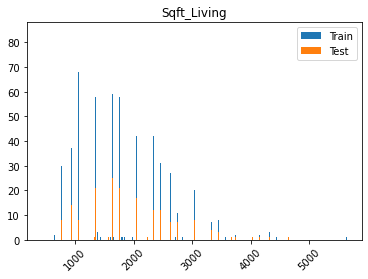

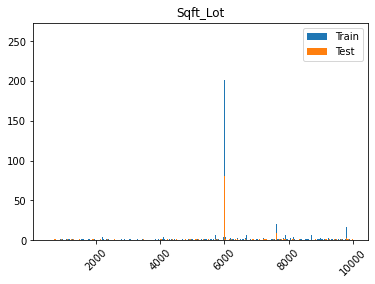

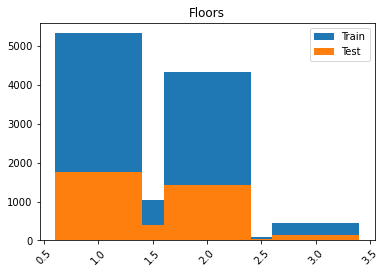

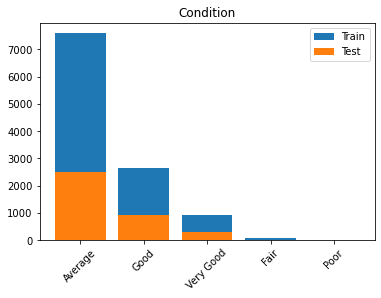

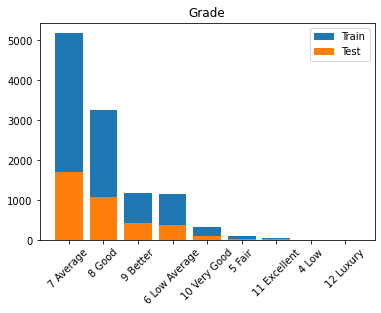

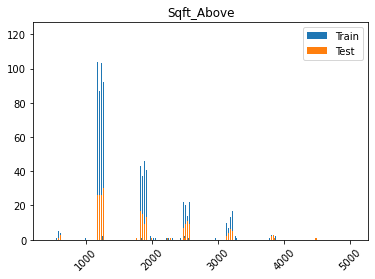

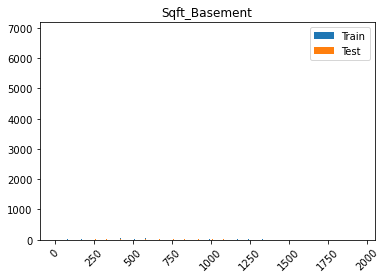

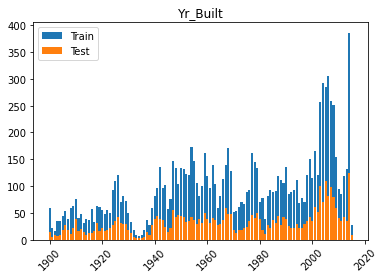

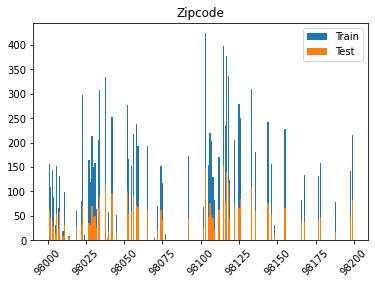

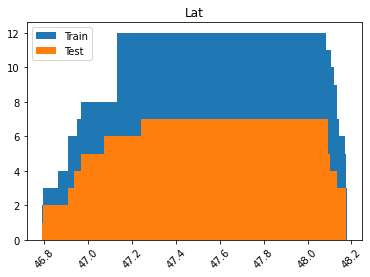

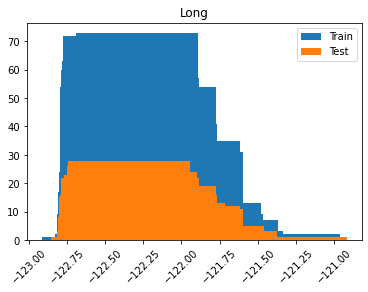

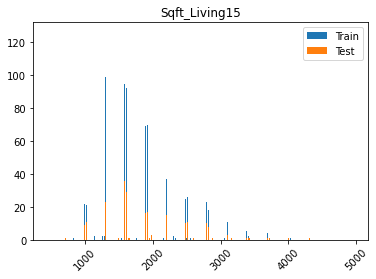

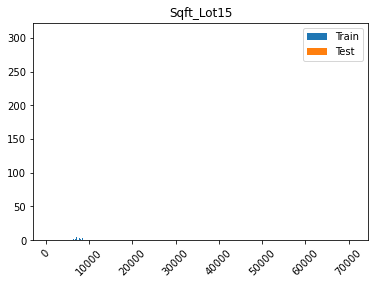

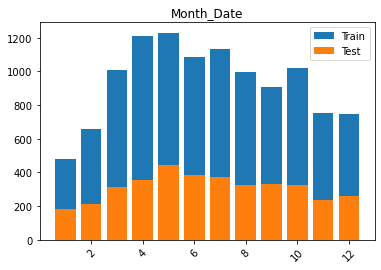

In [144]:
for col in used_cols:
    train_values = X_train[col].value_counts()
    test_values = X_test[col].value_counts()
    plt.bar(train_values.index, train_values, label = 'Train')
    plt.bar(test_values.index, test_values, label = 'Test')
    plt.title(f"{col.title()}")
    plt.xticks(rotation = 45)
    plt.legend()
    plt.show()

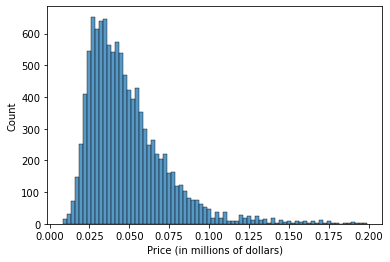

In [146]:
sns.histplot(y_train/10000000)
plt.xlabel("Price (in millions of dollars)");

<AxesSubplot:>

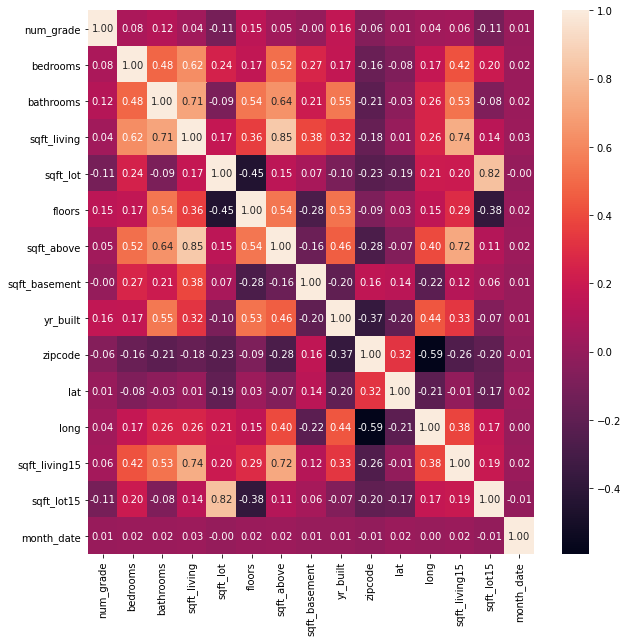

In [148]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr(), annot = True, fmt = '.2f')

<AxesSubplot:>

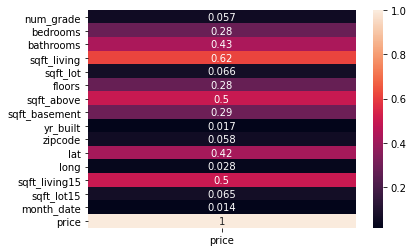

In [149]:
sns.heatmap(abs(train_df.corr())[['price']], annot = True)

In [151]:
train_target_mean = y_train.mean()
train_target_mean

485144.6841449301

In [153]:
baseline_train_preds = [train_target_mean] * len(y_train)
baseline_test_preds = [train_target_mean] * len(y_test)

In [161]:
print(f"Train R2: {r2_score(y_train, baseline_train_preds)}")
print(f"Test R2: {r2_score(y_test, baseline_test_preds)}")
print('****')
print(f"Train RMSE: {mean_squared_error(y_train, baseline_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, baseline_test_preds, squared = False)}") 



Train R2: 0.0
Test R2: -0.000801449053849268
****
Train RMSE: 249627.7288447142
Test RMSE: 256214.39931304308


In [166]:
fsm_X_train = X_train['sqft_living']
fsm_X_test = X_test['sqft_living']

In [183]:
ssm_X_train = X_train['sqft_living15']
ssm_X_test = X_test['sqft_living15']

In [184]:
ssm = sm.OLS(y_train, sm.add_constant(ssm_X_train)).fit()


In [186]:
ssm_train_preds = ssm.predict(sm.add_constant(ssm_X_train))
ssm_test_preds = ssm.predict(sm.add_constant(ssm_X_test))

In [187]:
ssm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     3799.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:20:15   Log-Likelihood:            -1.5390e+05
No. Observations:               11233   AIC:                         3.078e+05
Df Residuals:                   11231   BIC:                         3.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.161e+04   6856.736     11.902      0.000    6.82e+04    9.51e+04
sqft_living15   219.8569      3.567     61.633      0.000     212.865     226.849
==============================================================================
Omnibus:                     3683.989   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14966.686
Skew:                           1.584   Prob(JB):                         0.00
Kurtosis:                       7.685   Cond. No.                     6.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
fsm = sm.OLS(y_train, sm.add_constant(fsm_X_train)).fit()


In [164]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     6958.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:41:47   Log-Likelihood:            -1.5283e+05
No. Observations:               11233   AIC:                         3.057e+05
Df Residuals:                   11231   BIC:                         3.057e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.912e+04   5207.475     15.194      0.000    6.89e+04    8.93e+04
sqft_living   214.6121      2.573     83.416      0.000     209.569     219.655
==============================================================================
Omnibus:                     2550.484   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7571.953
Skew:                           1.178   Prob(JB):                         0.00
Kurtosis:                       6.260   Cond. No.                     5.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [167]:
fsm_train_preds = fsm.predict(sm.add_constant(fsm_X_train))
fsm_test_preds = fsm.predict(sm.add_constant(fsm_X_test))

In [168]:
print(f"Train R2: {r2_score(y_train, fsm_train_preds)}")
print(f"Test R2: {r2_score(y_test, fsm_test_preds)}")
print('****')
print(f"Train RMSE: {mean_squared_error(y_train, fsm_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, fsm_test_preds, squared = False)}") 


Train R2: 0.3825483106403561
Test R2: 0.3798476717622069
****
Train RMSE: 196152.71200816112
Test RMSE: 201687.39658260052


Train R2: 0.3825
Test R2: 0.3798
****
Train RMSE: $196,152.71
Test RMSE: $201,687.40
****
Train MAE: $147,085.55
Test MAE: $151,060.17


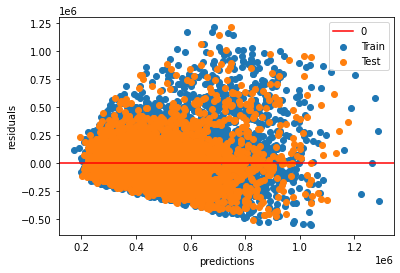

In [214]:
evaluate(y_train, fsm_train_preds, y_test, fsm_test_preds)

Train R2: 0.2527
Test R2: 0.2562
****
Train RMSE: $215,788.71
Test RMSE: $220,885.56
****
Train MAE: $157,145.97
Test MAE: $159,886.09


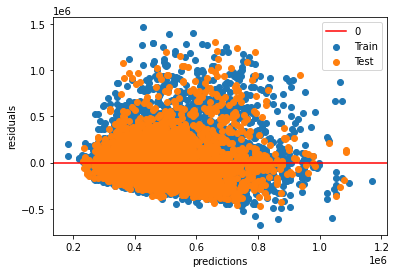

In [188]:
evaluate(y_train, ssm_train_preds, y_test, ssm_test_preds)

In [194]:
used_cols = [c for c in X_train.columns if c not in [*obj_cols]]

In [205]:
model = sm.OLS(y_train, sm.add_constant(X_train['sqft_living'])).fit()

In [206]:
sec_model = sm.OLS(y_train, sm.add_constant(X_train[used_cols])).fit()

In [207]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     6958.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:59:32   Log-Likelihood:            -1.5283e+05
No. Observations:               11233   AIC:                         3.057e+05
Df Residuals:                   11231   BIC:                         3.057e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.912e+04   5207.475     15.194      0.000    6.89e+04    8.93e+04
sqft_living   214.6121      2.573     83.416      0.000     209.569     219.655
==============================================================================
Omnibus:                     2550.484   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7571.953
Skew:                           1.178   Prob(JB):                         0.00
Kurtosis:                       6.260   Cond. No.                     5.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [208]:
sec_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     1403.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:59:34   Log-Likelihood:            -1.4986e+05
No. Observations:               11233   AIC:                         2.997e+05
Df Residuals:                   11218   BIC:                         2.999e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.792e+07   3.08e+06     -5.813      0.000    -2.4e+07   -1.19e+07
num_grade     -1.387e+04   1030.689    -13.454      0.000   -1.59e+04   -1.18e+04
bedrooms      -3.202e+04   2363.838    -13.546      0.000   -3.67e+04   -2.74e+04
bathrooms       4.27e+04   3508.529     12.172      0.000    3.58e+04    4.96e+04
sqft_living     175.4053      5.211     33.664      0.000     165.192     185.619
sqft_lot         -7.7804      1.176     -6.619      0.000     -10.085      -5.476
floors         3.399e+04   4404.730      7.717      0.000    2.54e+04    4.26e+04
sqft_above       19.1522      5.390      3.553      0.000       8.587      29.717
yr_built      -2064.0365     64.769    -31.868      0.000   -2190.996   -1937.078
zipcode        -342.4867     35.271     -9.710      0.000    -411.625    -273.349
lat            6.398e+05   1.14e+04     56.086      0.000    6.17e+05    6.62e+05
long          -2.067e+05    1.5e+04    -13.742      0.000   -2.36e+05   -1.77e+05
sqft_living15    80.8138      3.994     20.236      0.000      72.986      88.642
sqft_lot15       -1.7522      0.938     -1.868      0.062      -3.591       0.086
month_date    -3061.2738    455.924     -6.714      0.000   -3954.964   -2167.583
==============================================================================
Omnibus:                     3323.972   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17291.046
Skew:                           1.331   Prob(JB):                         0.00
Kurtosis:                       8.464   Cond. No.                     2.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train R2: 0.6365
Test R2: 0.6329
****
Train RMSE: $150,503.01
Test RMSE: $155,178.83
****
Train MAE: $107,360.70
Test MAE: $110,344.78


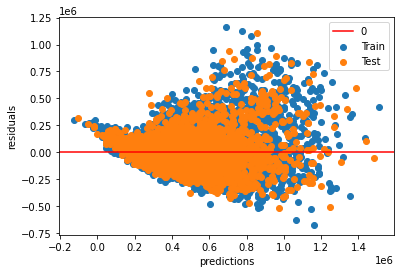

In [197]:
train_preds = model.predict(sm.add_constant(X_train[used_cols]))
test_preds = model.predict(sm.add_constant(X_test[used_cols]))
evaluate(y_train, train_preds, y_test, test_preds)

In [209]:
scaler = StandardScaler()

scaler.fit(X_train[used_cols])




StandardScaler()

In [211]:
X_train_scaled = scaler.transform(X_train[used_cols])
X_test_scaled = scaler.transform(X_test[used_cols])

In [ ]:
model = 

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [ ]:
# code here to arrive at a baseline prediction

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [136]:
#Our first model using the feature with highest correlation to price
simple_formula = 'price ~ sqft_living + bedrooms + bathrooms + sqft_living15'
date_mod = ols(formula = simple_formula, data = df_limited).fit()
date_mod_summ = date_mod.summary()

date_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     2521.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:19:22   Log-Likelihood:            -2.0364e+05
No. Observations:               14978   AIC:                         4.073e+05
Df Residuals:                   14973   BIC:                         4.073e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.533e+05   7689.167     19.942      0.000    1.38e+05    1.68e+05
sqft_living     225.4880      4.292     52.534      0.000     217.075     233.901
bedrooms      -5.088e+04   2551.508    -19.941      0.000   -5.59e+04   -4.59e+04
bathrooms      1227.4201   3199.539      0.384      0.701   -5044.068    7498.908
sqft_living15    38.4257      4.134      9.296      0.000      30.323      46.528
==============================================================================
Omnibus:                     3263.117   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9301.100
Skew:                           1.147   Prob(JB):                         0.00
Kurtosis:                       6.105   Cond. No.                     1.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [215]:
n_preds_log = model.predict(sm.add_constant(X_train_scaled))

In [216]:
model = sm.OLS(y_train_log, sm.add_constant(X_train_scaled)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1858.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:15:29   Log-Likelihood:                -692.99
No. Observations:               11233   AIC:                             1416.
Df Residuals:                   11218   BIC:                             1526.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9795      0.002   5341.474      0.000      12.975      12.984
x1             0.0096      0.002      3.847      0.000       0.005       0.015
x2            -0.0311      0.003     -9.592      0.000      -0.037      -0.025
x3             0.0603      0.004     14.135      0.000       0.052       0.069
x4             0.2090      0.006     32.598      0.000       0.196       0.222
x5            -0.0436      0.005     -9.116      0.000      -0.053      -0.034
x6             0.0249      0.004      5.932      0.000       0.017       0.033
x7             0.0215      0.006      3.470      0.001       0.009       0.034
x8            -0.1130      0.004    -32.181      0.000      -0.120      -0.106
x9            -0.0351      0.003    -11.020      0.000      -0.041      -0.029
x10            0.2128      0.003     80.312      0.000       0.208       0.218
x11           -0.0332      0.003     -9.922      0.000      -0.040      -0.027
x12            0.0969      0.004     24.862      0.000       0.089       0.105
x13           -0.0211      0.004     -4.911      0.000      -0.029      -0.013
x14           -0.0179      0.002     -7.341      0.000      -0.023      -0.013
==============================================================================
Omnibus:                      195.771   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.452
Skew:                          -0.089   Prob(JB):                     8.05e-82
Kurtosis:                       3.875   Cond. No.                         7.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [217]:
train_preds_log = model.predict(sm.add_constant(X_train_scaled))
test_preds_log = model.predict(sm.add_constant(X_test_scaled))

In [220]:
train_preds_unlog = np.exp(train_preds_log)
test_preds_unlog = np.exp(test_preds_log)

Train R2: 0.6365
Test R2: 0.6329
****
Train RMSE: $150,503.01
Test RMSE: $155,178.83
****
Train MAE: $107,360.70
Test MAE: $110,344.78


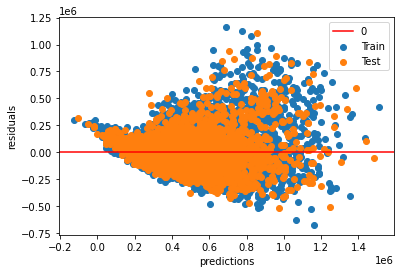

In [225]:
evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.6987
Test R2: 0.6925
****
Train RMSE: $0.26
Test RMSE: $0.27
****
Train MAE: $0.20
Test MAE: $0.20


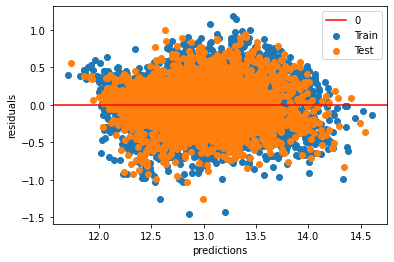

In [218]:
evaluate(y_train_log, train_preds_log, y_test_log, test_preds_log)

In [223]:
print(mean_squared_error(y_train, train_preds_unlog, squared = False))
print(mean_squared_error(y_test, test_preds_unlog, squared = False))

151405.80086485934
156317.63988778312


In [224]:
print(mean_absolute_error(y_train, train_preds_unlog))
print(mean_absolute_error(y_test, test_preds_unlog))

100054.4966448014
103487.15228500681


In [ ]:
# code here to evaluate your first 'substandard' model

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [ ]:
# code here to iteratively improve your models

In [ ]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [ ]:
# code here to show your final model

In [ ]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
